In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# update import path
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..', 'src'))

from polar import Polar

In [2]:
data = pd.read_csv('../data/polars/first-27.csv', delimiter=';')
data = data.rename(columns={'twa/tws': 'twa'})
data = data.set_index('twa')
data.columns = data.columns.astype('int')
data[data == 0] = np.nan
data.index=data.index.astype('int')
data = data.groupby(data.index).first()
data


,6,8,10,12,14,16,20
twa,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,5.41,5.47,NaN
40,NaN,4.30,NaN,5.24,NaN,NaN,5.49
41,NaN,NaN,4.90,NaN,NaN,NaN,NaN
42,3.68,NaN,NaN,NaN,NaN,NaN,NaN
52,4.10,4.85,5.44,5.75,5.90,5.97,5.99
60,4.30,5.09,5.63,5.90,6.05,6.16,6.21
75,4.46,5.29,5.76,6.02,6.22,6.39,6.60
90,4.41,5.37,5.92,6.19,6.39,6.48,6.84


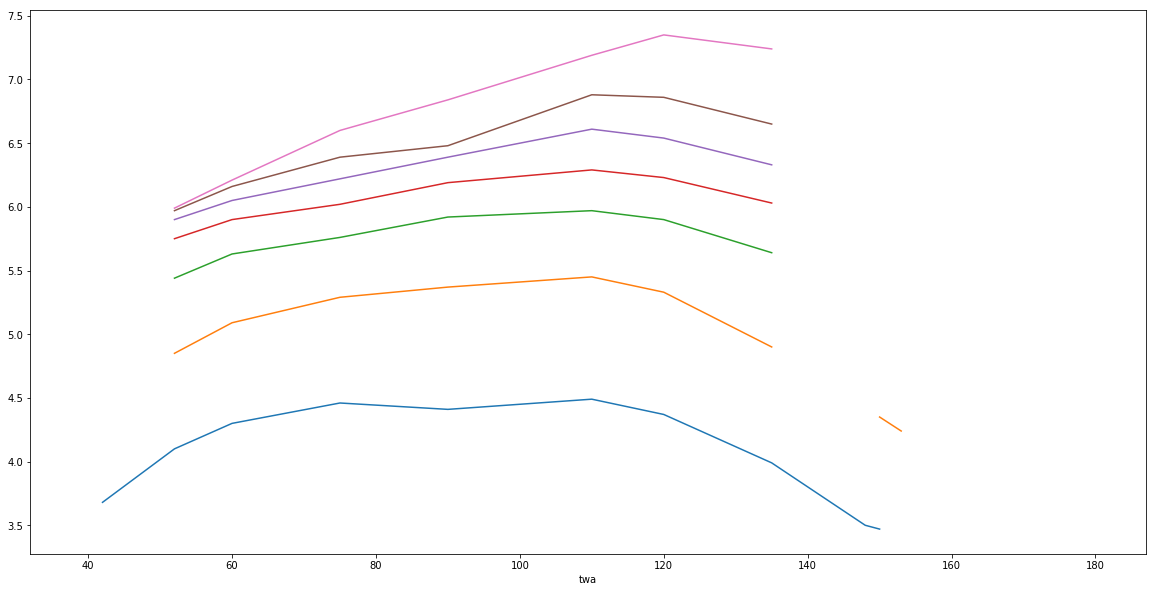

In [3]:
def show(data):
    _, ax = plt.subplots(figsize=(20, 10))
    tws_list = [6,8,10,12,14,16,20]
    for tws in tws_list:
        data[tws].plot(ax=ax)
    plt.show()

show(data)

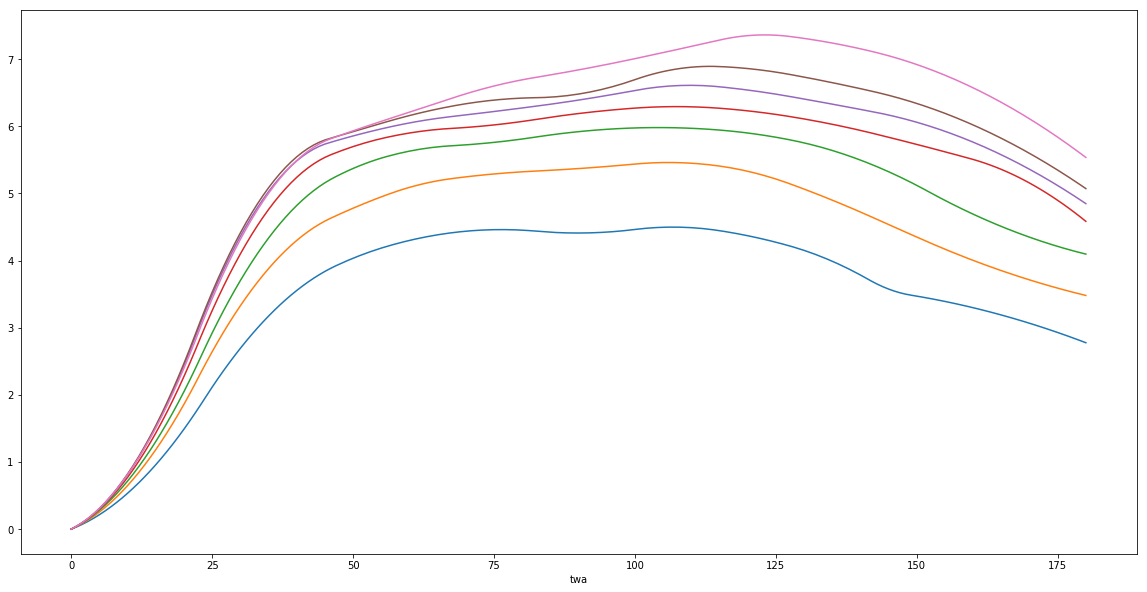

In [4]:
idx = np.arange(0, 181, 1)
df = data.reindex(idx)
df.iloc[0] = 0
df.iloc[5] = df.iloc[60] * 0.05
df.iloc[180] = df.iloc[150] * 0.8
df.interpolate(method='polynomial', order=2, inplace=True)
show(df)
#df

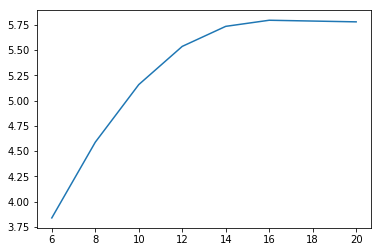

In [5]:
df.iloc[45].plot()

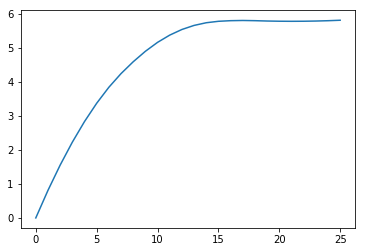

In [6]:
idx = np.arange(0, 26, 1)
series = df.iloc[45]
series[0] = 0
series[25] = series[20] * 1.005
series = series.reindex(idx).interpolate(method='polynomial', order=2)
series.plot()

In [9]:
polar = Polar('../data/polars/first-27.csv')
polar.get_speed(180, 25)

5.56368